## 1. Data selection, reasons, and problem definition

In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.1f}'.format
#https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

percent = 0.1 #샘플 비율 지정

df_audi = pd.read_csv("audi.csv")
df_audi = df_audi.sample(round(len(df_audi)*percent))
df_bmw = pd.read_csv("audi.csv")
df_bmw = df_bmw.sample(round(len(df_bmw)*percent))
df_cclass = pd.read_csv("cclass.csv")
df_cclass = df_cclass.sample(round(len(df_cclass)*percent))
df_focus = pd.read_csv("focus.csv")
df_focus = df_focus.sample(round(len(df_focus)*percent))
df_ford = pd.read_csv("ford.csv")
df_ford = df_ford.sample(round(len(df_ford)*percent))
df_hyundai = pd.read_csv("hyundai.csv")
df_hyundai = df_hyundai.sample(round(len(df_hyundai)*percent))
df_hyundai = df_hyundai.rename(columns={"tax(£)":"tax"}) #칼럼명 변경

df_merc = pd.read_csv("merc.csv")
df_merc = df_merc.sample(round(len(df_merc)*percent))
df_skoda = pd.read_csv("skoda.csv")
df_skoda = df_skoda.sample(round(len(df_skoda)*percent))
df_toyota = pd.read_csv("toyota.csv")
df_toyota = df_toyota.sample(round(len(df_toyota)*percent))
df_vauxhall = pd.read_csv("vauxhall.csv")
df_vauxhall = df_vauxhall.sample(round(len(df_vauxhall)*percent))
df_vw = pd.read_csv("vw.csv")
df_vw = df_vw.sample(round(len(df_vw)*percent))

#데이터 하나로 합치기
df_list = [df_audi, df_bmw, df_cclass, df_focus, df_ford, df_hyundai, df_merc, df_skoda, df_toyota, df_vauxhall, df_vw]
df = pd.concat(df_list, ignore_index=True)

print(df.shape)
df.sample(10)

(10843, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8650,Mokka,2015,7998,Manual,40834,Petrol,205.0,42.2,1.4
10778,Polo,2016,9290,Manual,30966,Petrol,20.0,60.1,1.2
4964,Tucson,2017,12990,Manual,36000,Diesel,150.0,61.7,1.7
2748,Focus,2013,4995,Manual,106000,Diesel,NaN,NaN,2.0
6776,Kodiaq,2019,34495,Automatic,50,Petrol,145.0,31.4,2.0
4206,Focus,2018,13000,Manual,16475,Diesel,150.0,74.3,1.5
232,A3,2014,9490,Manual,51390,Petrol,125.0,53.3,1.4
9950,Golf,2016,12295,Manual,24486,Petrol,30.0,53.3,1.4
4820,Fiesta,2017,12750,Semi-Auto,12687,Petrol,145.0,54.3,1.0
9063,Adam,2019,10995,Manual,15,Petrol,145.0,44.8,1.2


In [278]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

In [279]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10843.0,10843.0,10843.0,9908.0,9908.0,10843.0
mean,2017.1,16820.5,23247.9,120.2,54.4,1.6
std,2.1,9739.1,21160.2,64.5,12.9,0.5
min,1996.0,795.0,1.0,0.0,1.1,0.0
25%,2016.0,10200.0,7881.0,125.0,45.6,1.2
50%,2017.0,14545.0,17489.0,145.0,54.3,1.5
75%,2019.0,20599.0,32209.0,145.0,61.7,2.0
max,2020.0,135000.0,259000.0,580.0,235.0,6.2


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10843 entries, 0 to 10842
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10843 non-null  object 
 1   year          10843 non-null  int64  
 2   price         10843 non-null  int64  
 3   transmission  10843 non-null  object 
 4   mileage       10843 non-null  int64  
 5   fuelType      10843 non-null  object 
 6   tax           9908 non-null   float64
 7   mpg           9908 non-null   float64
 8   engineSize    10843 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 762.5+ KB


In [281]:
#delete column"tax"
df = df.drop(["tax"], axis = 1)

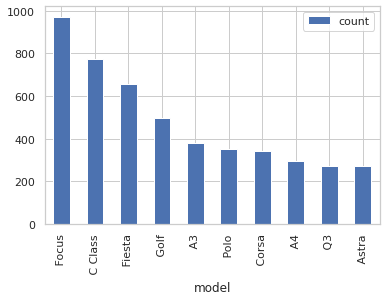

          count
model          
 Focus      973
 C Class    775
 Fiesta     655
 Golf       498
 A3         379
 Polo       349
 Corsa      340
 A4         294
 Q3         272
 Astra      271


Index([' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Polo', ' Corsa',
       ' A4', ' Q3', ' Astra'],
      dtype='object', name='model')

In [282]:
#Check Trend: top10 sold out models
import matplotlib.pyplot as plt

models = pd.DataFrame(df.groupby("model")["model"].count())
models.columns = ["count"]
models.sort_values(by=["count"], inplace=True, ascending=False)
models = models.head(10)
models.plot.bar()
plt.show()
print(models)
models.index

          count  avg_price
model                     
 Focus      973    13346.1
 C Class    775    23240.7
 Fiesta     655    10097.0
 Golf       498    16745.4
 A3         379    17266.4
 Polo       349    11184.3
 Corsa      340     8242.5
 A4         294    20080.4
 Q3         272    22871.5
 Astra      271    10133.4
15320.779926944233


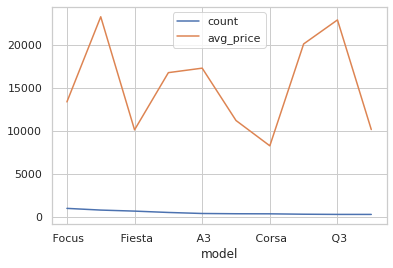

In [283]:
#top10 best selling cars avg price
models_avg_price = df.groupby("model")["price"].mean()
models_avg_price[[' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4']]
models['avg_price'] = models_avg_price
models.plot.line()
print(models)
print(models["avg_price"].mean())

In [284]:
#top10 best selling cars avg year
models_avg_year = df.groupby("model")["year"].mean()
models_avg_year[[' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4']]
models['avg_year'] = models_avg_year
print(models)
print(models["avg_year"].mean())

          count  avg_price  avg_year
model                               
 Focus      973    13346.1    2017.1
 C Class    775    23240.7    2017.3
 Fiesta     655    10097.0    2016.8
 Golf       498    16745.4    2017.1
 A3         379    17266.4    2016.7
 Polo       349    11184.3    2016.9
 Corsa      340     8242.5    2016.7
 A4         294    20080.4    2016.8
 Q3         272    22871.5    2017.3
 Astra      271    10133.4    2016.7
2016.9468266526485


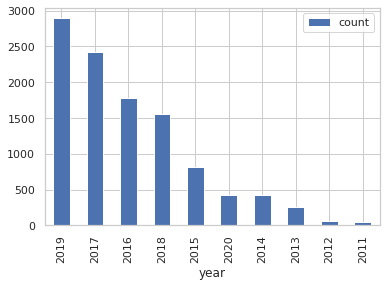

      count
year       
2019   2892
2017   2418
2016   1782
2018   1557
2015    821
2020    430
2014    422
2013    255
2012     67
2011     42


In [285]:
#Check Trend: top10 sold out years

years = pd.DataFrame(df.groupby("year")["year"].count())
years.columns = ["count"]
years.sort_values(by=["count"], inplace=True, ascending=False)
years = years.head(10)
years.plot.bar()
plt.show()
print(years)

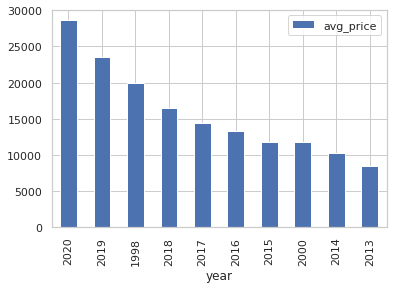

      avg_price
year           
2020    28623.3
2019    23488.2
1998    19990.0
2018    16556.5
2017    14465.7
2016    13314.1
2015    11796.9
2000    11750.0
2014    10290.5
2013     8514.7


In [286]:
#Check Trend: top10 years average price

years_price = pd.DataFrame(df.groupby("year")["price"].mean())
years_price.columns = ["avg_price"]
years_price.sort_values(by=["avg_price"], inplace=True, ascending=False)
years_price = years_price.head(10)
years_price.plot.bar()
plt.show()
print(years_price)

In [287]:
#Check how many 1970 & 1998 cars were sold

condition = (df["year"] == 1970) | (df["year"] == 1998)
df[condition]

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
5487,S Class,1998,19990,Automatic,43534,Petrol,23.3,6.0


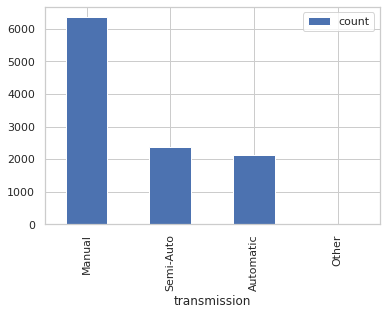

              count
transmission       
Manual         6353
Semi-Auto      2366
Automatic      2123
Other             1


In [288]:
#Check transmissions
transmission = pd.DataFrame(df.groupby(["transmission"])["transmission"].count())
transmission.columns = ["count"]
transmission.sort_values(by=["count"], inplace=True, ascending=False)
transmission.plot.bar()
plt.show()
print(transmission)

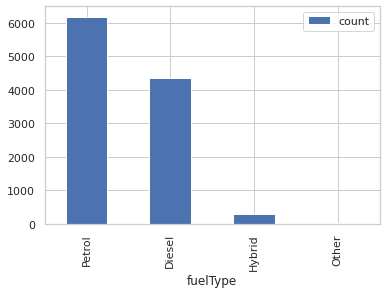

      avg_price
year           
2020    28623.3
2019    23488.2
1998    19990.0
2018    16556.5
2017    14465.7
2016    13314.1
2015    11796.9
2000    11750.0
2014    10290.5
2013     8514.7


In [289]:
#Check fuelType

fuelType = pd.DataFrame(df.groupby("fuelType")["fuelType"].count())
fuelType.columns = ["count"]
fuelType.sort_values(by=["count"], inplace=True, ascending=False)
fuelType.plot.bar()
plt.show()
print(years_price)

In [290]:
#Now we can see
#Years: 15-19 Popular
#Model: Focus / C Class / Fiesta / Golf / A3      
#Transmission: manual
#feul type: Petrol / diessel


## 2. Data preprocessing, EDA, and visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


20

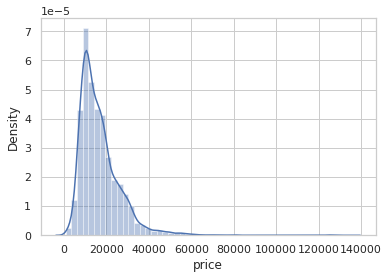

In [291]:
#Check "price" Outliers
sns.distplot(df['price'], kde=True, rug=False)
condition = (df["price"] >75000)
df[condition]["price"].count()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,model,year,price,transmission,mileage,fuelType,mpg,engineSize


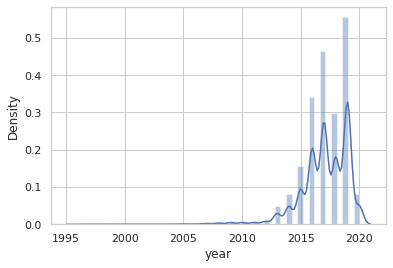

In [292]:
#Check "year" Outliers
sns.distplot(df['year'], kde=True, rug=False)
condition = (df["year"] >2020) | (df["year"] <1990)
df[condition]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3

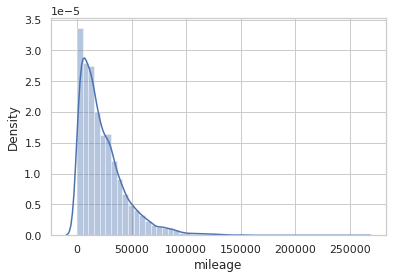

In [293]:
#Check "mileage" Outliers
sns.distplot(df['mileage'], kde=True, rug=False)
condition = (df["mileage"] >150000)
df[condition]["model"].count()

In [294]:
#Delete Outliers
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) &
        (df['mileage'] >= np.percentile(df['mileage'], 0.5)) & 
        (df['mileage'] <= np.percentile(df['mileage'], 99.5)) &
        (df['year'] >= np.percentile(df['year'], 0.5)) & 
        (df['year'] <= np.percentile(df['year'], 99.5))]

In [295]:
#fill null values with average of mpg
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


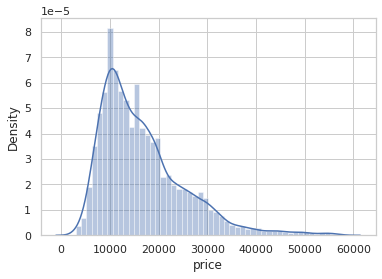

In [296]:
sns.distplot(df['price'], kde=True, rug=False)

22559.93647810562


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


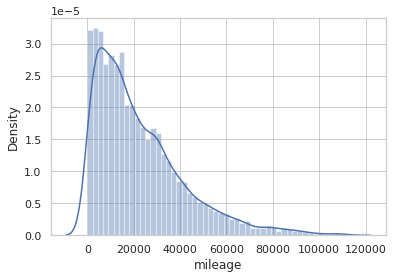

In [297]:
print(df['mileage'].mean())
sns.distplot(df['mileage'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


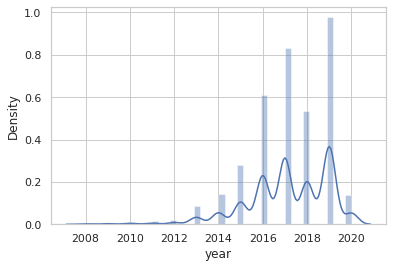

In [298]:
sns.distplot(df['year'], kde=True, rug=False)

In [299]:
# sns.distplot(df[(df['year']>2015)]['mileage'], kde=True, rug=False)

In [300]:
# sns.distplot(df[(df['year']>2009)&(df['year']<2015)]['mileage'], kde=True, rug=False)

In [301]:
# sns.distplot(df[(df['price']<=16500)]['mileage'], kde=True, rug=True)

In [302]:
# sns.distplot(df[(df['price']>16500)]['mileage'], kde=True, rug=True)

In [303]:
# sns.distplot(df[(df['price']>16500)&(df['mileage']<10000)]['year'], kde=True, rug=True)

In [304]:
# sns.distplot(df[(df['price']<=16500)]['year'], kde=True, rug=True)

mean:  16634.226931028003
median:  14640.0


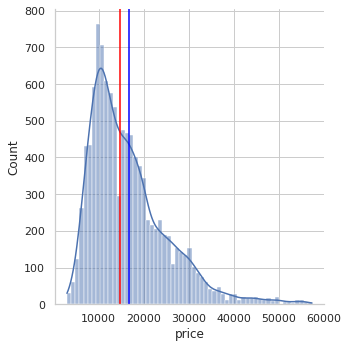

In [305]:
#베이스라인 모델 만들기
y_train = df["price"]

## SalePrice의 확률밀도함수를 그려보겠습니다
sns.displot(df['price'], kde=True)

## 평균과, 중간값으로 수직선을 그려보겠습니다.
plt.axvline(df['price'].mean(), color='blue')
plt.axvline(df['price'].median(), color='red');
print("mean: ", df['price'].mean())
print("median: ", df['price'].median())

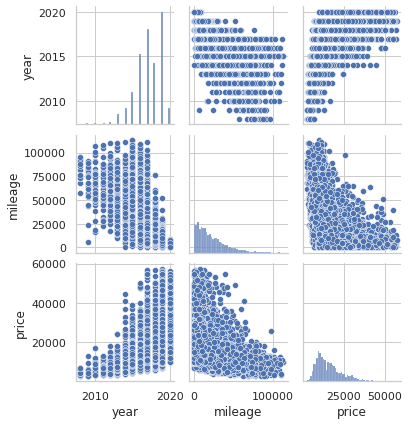

In [306]:
sns.set(style='whitegrid', context='notebook')
cols = ['year', 'mileage','price']
sns.pairplot(df[cols], height=2);

In [323]:
# Get MAE with average pirce 
from sklearn.metrics import mean_absolute_error
price_mean = df["price"].mean()
y_pred = [price_mean] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'avg_price error: {mae:.2f}')

avg_price error: 6658.23


## 3. Modeling and model analysis

In [316]:
## train set, validation set, test set
from sklearn.model_selection import train_test_split

X = df.drop(columns="price")
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=None)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5959, 7)
y_train shape:  (5959,)
X_val shape:  (2554, 7)
y_val shape:  (2554,)
X_test shape:  (2129, 7)
y_test shape:  (2129,)


In [326]:
# Make baseline model
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

# Select features
features = ["year", "mileage"]

X_train_base = X_train[features]
X_val_base = X_val[features]

# fit into baseline model
baseline_model.fit(X_train_base, y_train)
y_pred_train_base = baseline_model.predict(X_train_base)
mae = mean_absolute_error(y_train, y_pred_train_base)
print(f'train errors: {mae:.2f}')

# validation set
y_pred_val_base = baseline_model.predict(X_val_base)
mae = mean_absolute_error(y_val, y_pred_val_base)
print(f'valid errors: {mae:.2f}')


train errors: 5594.23
valid errors: 5640.76


In [ ]:
# 회귀방정식 평가지표
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y, y_pred)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))